In [234]:
import os
import json
import pandas as pd
import numpy as np
import seaborn as sns
import pylab as plt
import matplotlib as mpl
from pylab import rcParams
import re
from scipy import integrate

In [235]:
rcParams['figure.figsize'] = 20, 5
rcParams['legend.fontsize'] = 18
rcParams['axes.titlesize'] = 18
rcParams['xtick.labelsize'] = 24
rcParams['ytick.labelsize'] = 24
rcParams['grid.color'] = 'black'
rcParams['axes.grid'] = True

In [263]:
def make_tex_label(source_label):
    newlabels = source_label.split('BREAK')
    return '${0}$\n${1}$'.format(
        newlabels[0].replace('down','\\downarrow').replace('up','\\uparrow'), 
        newlabels[1].replace('down','\\downarrow').replace('up','\\uparrow'))
def postprocess_labels_for_grouping_plot(axes, labels):
    labels = list(map(make_tex_label,labels))
    axes.set_xticklabels(labels,rotation = 1)
    axes.legend(['fraction of\nend pattern'])

In [264]:
res_folder = 'C:\\Users\\alexandr.pankratov\\Desktop\\kungurka'

In [268]:
def load_meta(path):
    curr=''
    with open(path) as inp:
        curr = json.load(inp)
    curr['init_pattern'] = np.fromstring(re.sub('[\\s]+', ' ',curr['init_pattern'][1:-1]), dtype=np.float, sep=' ')
    curr['end_pattern'] = np.fromstring(re.sub('[\\s]+', ' ',curr['end_pattern'][1:-1]), dtype=np.float, sep=' ')
    return curr

def draw_data(xs,data_start,data_end,label):
    plt.plot(xs,data_start,color='#117733',linewidth=5, label = 'Начальные\nусловия')
    plt.plot(xs,data_end,color='#FF5555',linewidth=9,label = 'Итоговый\nпаттерн')
    y_ticks = plt.yticks()[0]
    y_labels = [' ']+[str(i)[:3] for i in y_ticks[1:-1]]+['${0}$'.format(label)]
    x_ticks = plt.xticks()[0][1:-1]
    x_labels = [str(i) for i in x_ticks[:-1]]+['$x$']
    plt.xticks(ticks = x_ticks,labels = x_labels)
    plt.yticks(ticks = y_ticks,labels = y_labels)
    plt.legend(loc='upper right')
    plt.show()

def draw_meta(path):
    meta = load_meta(path)
    print(meta['params'],meta['init'])
    xs = np.array([i*meta['params']['dx'] for i in range(meta['init']['points_count'])])
    draw_data(xs,meta['init_pattern'][::2],meta['end_pattern'][::2],'U')
    draw_data(xs,meta['init_pattern'][1::2],meta['end_pattern'][1::2],'V')
    

{'p': 3, 'q': 1, 'Du': 10, 'Dv': 1, 'dx': 0.2} {'pattern_type': 'cos', 'amp': 0.5, 'points_count': 200, 'picks_count': 3.0}


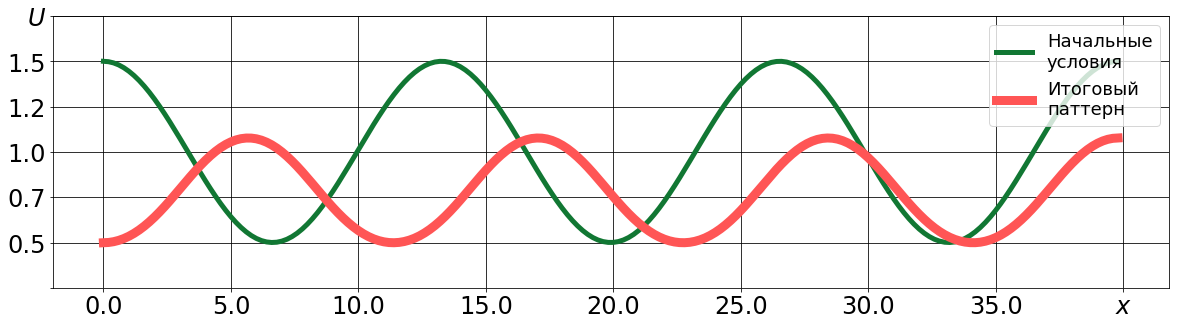

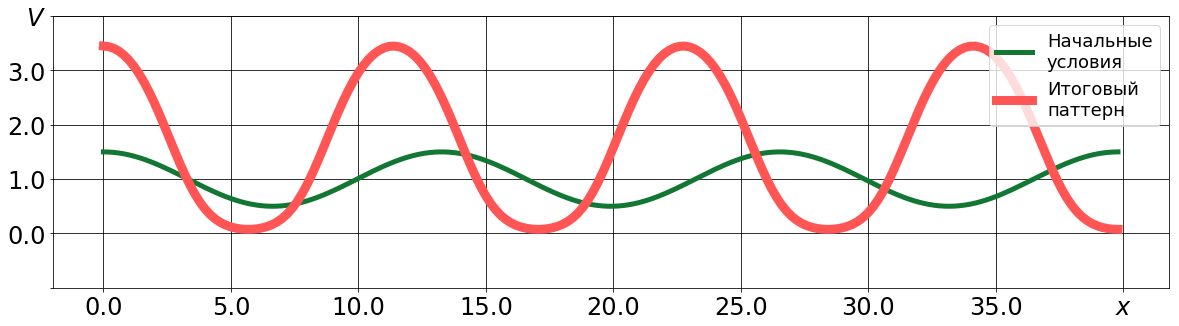

In [269]:
#332288, 88CCEE, 44AA99, 117733, 999933, DDCC77, CC6677, 882255, AA4499
draw_meta('C:\\Users\\alexandr.pankratov\\math_new\\2020-02-02\\2020-02-02 17_33_18.422788\\meta.json')

{'p': 3, 'q': 1, 'Du': 7, 'Dv': 1, 'dx': 0.2} {'pattern_type': 'rand', 'amp': 0.5, 'points_count': 200, 'picks_count': 2.0}


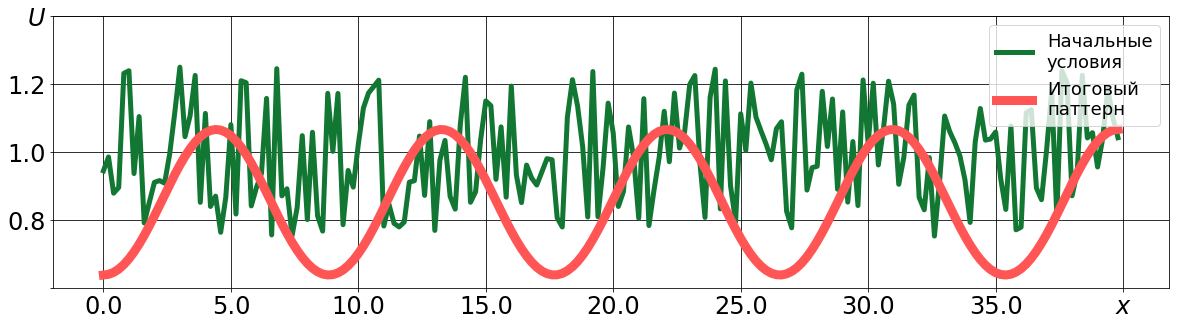

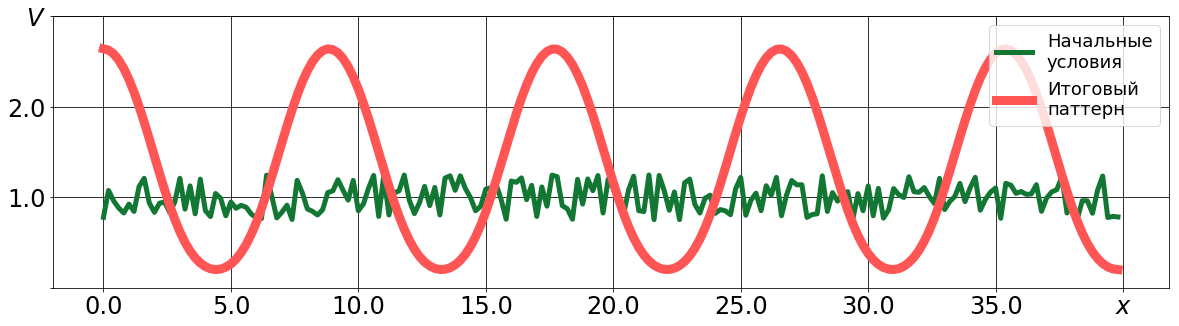

In [270]:
draw_meta('C:\\Users\\alexandr.pankratov\\math_newest\\2020-02-02\\2020-02-02 18_19_09.149596\\meta.json')